In [0]:
import numpy as np
import pandas as pd
import seaborn as sns
import pandas_profiling as pp
import matplotlib.pyplot as plt
%matplotlib inline

from collections import Counter
from sklearn.preprocessing import StandardScaler

In [0]:
import warnings
warnings.filterwarnings("ignore")

In [0]:
PCD_PATH = 'power_consumption.csv'
NUM_PERIODS = 5

In [4]:
!wget -O {PCD_PATH} http://ps2.railsreactor.net/datasets/power_consumption/household_power_consumption.csv

--2019-07-21 00:04:18--  http://ps2.railsreactor.net/datasets/power_consumption/household_power_consumption.csv
Resolving ps2.railsreactor.net (ps2.railsreactor.net)... 65.19.181.123
Connecting to ps2.railsreactor.net (ps2.railsreactor.net)|65.19.181.123|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 126735592 (121M) [application/octet-stream]
Saving to: ‘power_consumption.csv’

power_consumption.c 100%[===================>] 120.86M  90.6MB/s    in 1.3s    

2019-07-21 00:04:20 (90.6 MB/s) - ‘power_consumption.csv’ saved [126735592/126735592]



In [5]:
df = pd.read_csv(PCD_PATH)
for col in df.columns.values[2:]:
    df[col][df[col] == '?'] = np.NaN
    df[col] = df[col].astype(float)
df['Energy_consumed'] = df['Global_active_power'] * 1000 / 60 - df['Sub_metering_1']
- df['Sub_metering_2'] - df['Sub_metering_3']

0         -18.0
1         -17.0
2         -19.0
3         -18.0
4         -18.0
5         -19.0
6         -18.0
7         -18.0
8         -18.0
9         -18.0
10        -18.0
11        -18.0
12        -17.0
13        -19.0
14        -18.0
15        -17.0
16        -17.0
17        -17.0
18        -18.0
19        -17.0
20        -16.0
21        -17.0
22        -16.0
23        -17.0
24        -17.0
25        -17.0
26        -17.0
27        -17.0
28        -17.0
29        -17.0
           ... 
2075229    -1.0
2075230    -1.0
2075231    -1.0
2075232    -1.0
2075233    -1.0
2075234    -2.0
2075235    -1.0
2075236    -1.0
2075237    -1.0
2075238    -1.0
2075239    -1.0
2075240    -1.0
2075241    -2.0
2075242    -1.0
2075243    -1.0
2075244    -1.0
2075245    -1.0
2075246    -1.0
2075247    -1.0
2075248    -0.0
2075249    -0.0
2075250    -0.0
2075251    -0.0
2075252    -0.0
2075253    -0.0
2075254    -0.0
2075255    -0.0
2075256    -0.0
2075257    -0.0
2075258    -0.0
Length: 2075259, dtype: 

In [6]:
print(df.shape)
df.head()

(2075259, 10)


,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Energy_consumed
0,16/12/2006,17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0,70.266667
1,16/12/2006,17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0,89.333333
2,16/12/2006,17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0,89.566667
3,16/12/2006,17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0,89.800000
4,16/12/2006,17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0,61.100000


In [7]:
df.isna().sum()

Date                         0
Time                         0
Global_active_power      25979
Global_reactive_power    25979
Voltage                  25979
Global_intensity         25979
Sub_metering_1           25979
Sub_metering_2           25979
Sub_metering_3           25979
Energy_consumed          25979
dtype: int64

In [0]:
df.interpolate(inplace=True)

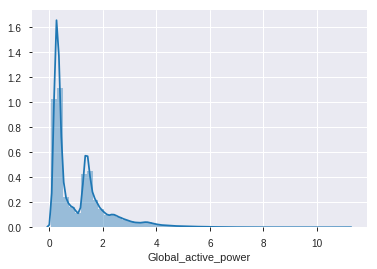

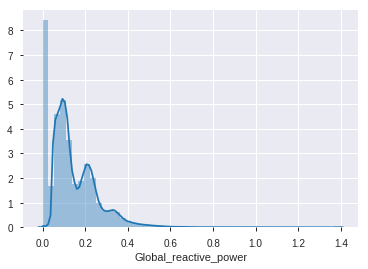

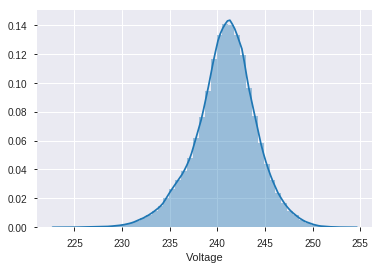

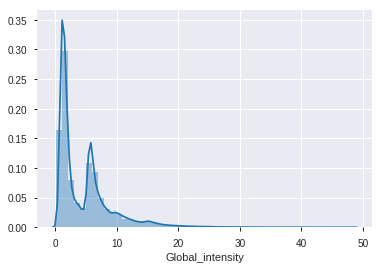

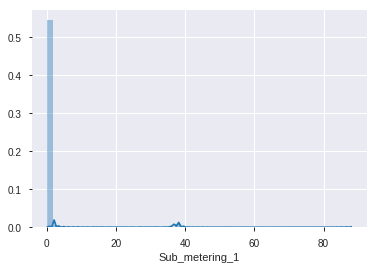

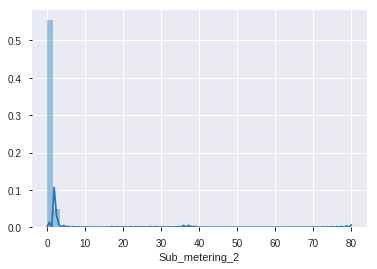

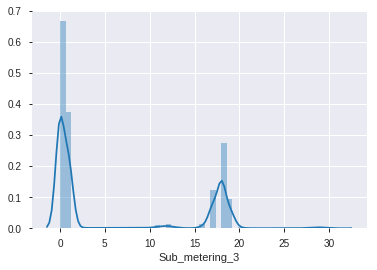

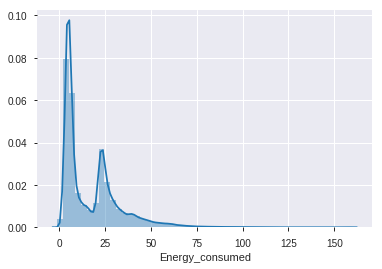

In [9]:
for c in df.columns.values[2:]:
    plt.figure()
    sns.distplot(df[c])

In [10]:
grouped = df.drop(columns=['Time']).groupby('Date', sort=False).aggregate(np.mean)
grouped.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Energy_consumed
Date,,,,,,,,
16/12/2006,3.053475,0.088187,236.243763,13.082828,0.000000,1.378788,12.439394,50.891246
17/12/2006,2.354486,0.156949,240.087028,9.999028,1.411806,2.907639,9.264583,37.829630
18/12/2006,1.530435,0.112356,241.231694,6.421667,0.738194,1.820139,9.734722,24.769051
19/12/2006,1.157079,0.104821,241.999313,4.926389,0.582639,5.279167,4.303472,18.702014
20/12/2006,1.545658,0.111804,242.308063,6.467361,0.000000,1.838889,9.765972,25.760972


There is seasonal behavior. Trendline shows that the power consumption goes down.


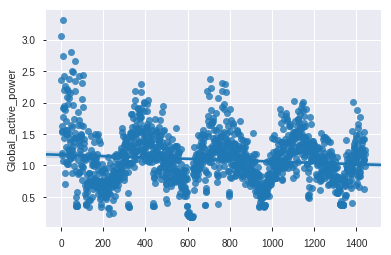

In [29]:
sns.regplot(x=np.arange(grouped.shape[0]), y=grouped['Global_active_power'])
print('There is seasonal behavior. Trendline shows that the power consumption goes down.')

In [12]:
dates = df[(df['Date'] == '1/2/2008') | (df['Date'] == '2/2/2008')].reset_index().drop(columns=['index'])
dates.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Energy_consumed
0,1/2/2008,00:00:00,2.268,0.184,239.79,9.4,0.0,0.0,18.0,37.800000
1,1/2/2008,00:01:00,2.210,0.188,240.70,9.2,0.0,0.0,17.0,36.833333
2,1/2/2008,00:02:00,2.270,0.184,239.96,9.4,0.0,0.0,18.0,37.833333
3,1/2/2008,00:03:00,2.238,0.182,239.63,9.4,0.0,0.0,18.0,37.300000
4,1/2/2008,00:04:00,2.204,0.184,240.11,9.2,0.0,0.0,17.0,36.733333


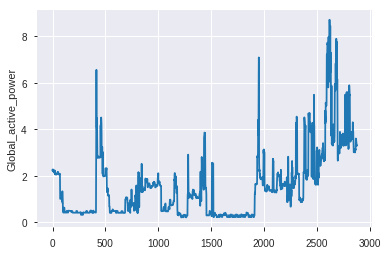

In [13]:
sns.lineplot(x=np.arange(dates.shape[0]), y=dates['Global_active_power'])

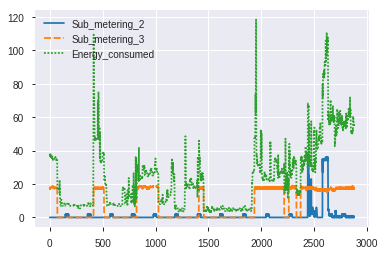

In [14]:
sns.lineplot(data=dates.iloc[:, -3:])

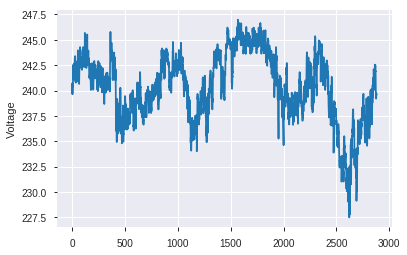

In [15]:
sns.lineplot(x=np.arange(dates.shape[0]), y=dates['Voltage'])

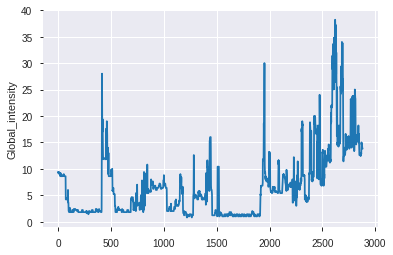

In [16]:
sns.lineplot(x=np.arange(dates.shape[0]), y=dates['Global_intensity'])

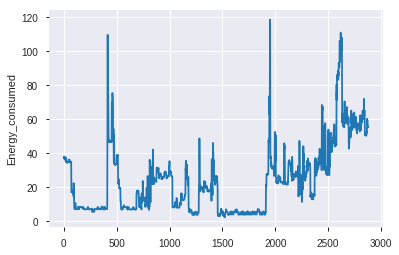

In [17]:
sns.lineplot(x=np.arange(dates.shape[0]), y=dates['Energy_consumed'])

In [0]:
def detect_outliers(data,n,features):
    outlier_indices = []
    
    for col in features:
        Q1 = np.percentile(data[col], 25)
        Q3 = np.percentile(data[col], 75)
        IQR = Q3 - Q1
        
        outlier_step = 1.5 * IQR
        outlier_list_col = data[(data[col] < Q1 - outlier_step) | (data[col] > Q3 + outlier_step )].index
        outlier_indices.extend(outlier_list_col)
        
    outlier_indices = Counter(outlier_indices)        
    multiple_outliers = list( k for k, v in outlier_indices.items() if v > n )
    
    return multiple_outliers

In [19]:
print('Dates of abnormal voltage consumption\n', detect_outliers(grouped, 0, ['Voltage']))
print('Current abnormal consumption dates\n', detect_outliers(grouped, 0, ['Global_intensity']))

Dates of abnormal voltage consumption
 ['16/12/2006', '23/4/2007', '24/4/2007', '25/4/2007', '26/4/2007', '27/4/2007', '28/4/2007', '29/4/2007', '30/4/2007', '1/5/2007', '2/5/2007', '3/5/2007', '4/5/2007', '5/5/2007', '6/5/2007', '7/5/2007', '8/5/2007', '9/5/2007', '10/5/2007', '11/5/2007', '12/5/2007', '13/5/2007', '14/5/2007', '15/5/2007', '16/5/2007', '17/5/2007', '18/5/2007', '19/5/2007', '20/5/2007', '21/5/2007', '22/5/2007', '23/5/2007', '24/5/2007', '25/5/2007', '26/5/2007', '27/5/2007', '28/5/2007', '29/5/2007', '30/5/2007', '31/5/2007', '1/6/2007', '2/6/2007', '3/6/2007', '4/6/2007', '5/6/2007', '6/6/2007', '7/6/2007', '8/6/2007', '16/7/2007', '17/7/2007', '18/7/2007', '19/7/2007', '20/7/2007', '21/7/2007', '22/7/2007', '23/7/2007', '24/7/2007', '25/7/2007', '26/7/2007', '27/7/2007', '28/7/2007', '29/7/2007', '30/7/2007', '31/7/2007', '1/8/2007', '2/8/2007', '3/8/2007', '4/8/2007', '5/8/2007', '6/8/2007', '7/8/2007', '8/8/2007', '9/8/2007', '10/8/2007', '11/8/2007', '12/8/2007

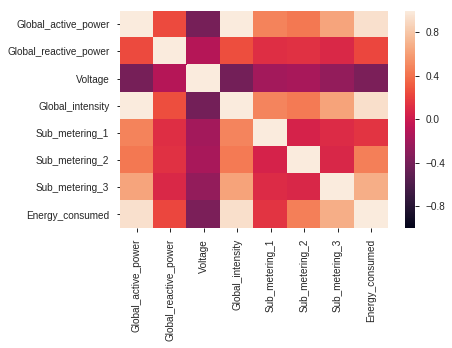

In [20]:
sns.heatmap(df.corr(), vmin=-1, vmax=1)

In [0]:
date_features = pd.DataFrame(df['Date'].str.split('/').tolist(), columns=['Day','Month', 'Year'], dtype=float)
time_features = pd.DataFrame(df['Time'].str.split(':').tolist(), columns=['Hours', 'Minutes', 'Sec'], dtype=float).drop(columns=['Sec'])

In [0]:
# generate the following features:
# Days
date_features['Day_sin'] = np.sin(2 * np.pi * date_features['Day'] / date_features['Day'].max())
date_features['Day_cos'] = np.cos(2 * np.pi * date_features['Day'] / date_features['Day'].max())
# Months
date_features['Month_sin'] = np.sin(2 * np.pi * date_features['Month'] / date_features['Month'].max())
date_features['Month_cos'] = np.cos(2 * np.pi * date_features['Month'] / date_features['Month'].max())
# Years
date_features['Year'] = date_features['Year'] - date_features['Year'].min()
# Hours
time_features['Hours_sin'] = np.sin(2 * np.pi * time_features['Hours'] / time_features['Hours'].max())
time_features['Hours_cos'] = np.cos(2 * np.pi * time_features['Hours'] / time_features['Hours'].max())
# Minutes
time_features['Minutes_sin'] = np.sin(2 * np.pi * time_features['Minutes'] / time_features['Minutes'].max())
time_features['Minutes_cos'] = np.cos(2 * np.pi * time_features['Minutes'] / time_features['Minutes'].max())

generated = date_features.merge(time_features, left_index=True, right_index=True).drop(columns=['Day', 'Month', 'Hours', 'Minutes'])

In [0]:
new_df = df.drop(columns=['Date', 'Time'])
for i in range(1, NUM_PERIODS + 1): 
    new_df[f'GAP_{i}'] = new_df['Global_active_power'].shift(periods=i)
new_df.dropna(inplace=True)

In [0]:
scaler = StandardScaler().fit(new_df)
new_df = pd.DataFrame(scaler.transform(new_df), columns=new_df.columns)
new_df = new_df.merge(generated, left_index=True, right_index=True)

In [25]:
new_df.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Energy_consumed,GAP_1,GAP_2,GAP_3,GAP_4,GAP_5,Year,Day_sin,Day_cos,Month_sin,Month_cos,Hours_sin,Hours_cos,Minutes_sin,Minutes_cos
0,2.308284,3.543482,-1.795321,2.345812,-0.181412,0.122830,1.254494,2.678030,2.446982,4.082891,4.069572,4.056254,2.969441,0.0,-0.101168,-0.994869,-2.449294e-16,1.0,-0.997669,-0.068242,0.552800,-0.833314
1,2.481188,3.525691,-1.773701,2.526632,-0.181412,-0.049982,1.254494,2.873280,2.308280,2.446970,4.082872,4.069554,4.056244,0.0,-0.101168,-0.994869,-2.449294e-16,1.0,-0.997669,-0.068242,0.461093,-0.887352
2,2.479288,3.525691,-1.733550,2.526632,-0.181412,-0.049982,1.254494,2.871134,2.481183,2.308269,2.446959,4.082854,4.069544,0.0,-0.101168,-0.994869,-2.449294e-16,1.0,-0.997669,-0.068242,0.364161,-0.931336
3,2.448887,3.436737,-2.113443,2.526632,-0.181412,-0.049982,1.254494,2.836804,2.479283,2.481171,2.308257,2.446947,4.082844,0.0,-0.101168,-0.994869,-2.449294e-16,1.0,-0.997669,-0.068242,0.263103,-0.964768
4,2.443187,3.436737,-2.153595,2.526632,-0.181412,0.122830,1.135671,2.830368,2.448882,2.479271,2.481159,2.308246,2.446940,0.0,-0.101168,-0.994869,-2.449294e-16,1.0,-0.997669,-0.068242,0.159063,-0.987268


In [0]:
X = new_df.drop(columns=['Global_active_power'])
y = new_df['Global_active_power']

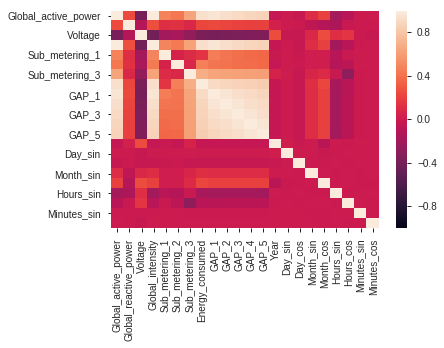

In [27]:
sns.heatmap(new_df.corr(), vmin=-1, vmax=1)

In [28]:
new_df.profile_report()